In [ ]:
## MITxPro Data Science and Big Data Analytics: Making Data-Driven Decisions
## Case Study of Recommender for Movies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import graphlab

In [3]:
col_names=["user_id","item_id","rating","timestamp"]
data=pd.read_table("u.data",names=col_names)
data=data.drop("timestamp",1)

Text(0,0.5,u'Frequency')

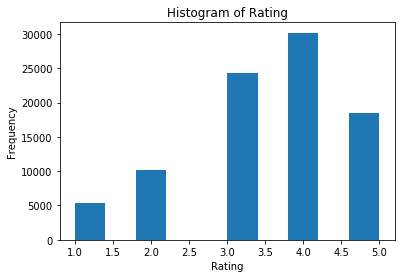

In [40]:
plt.hist(data["rating"])
plt.title('Histogram of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')

In [5]:
# Data Sparity
Number_Ratings=len(data)
Number_Movies=len(np.unique(data["item_id"]))
Number_Users=len(np.unique(data["user_id"]))
sparsity=100.0*Number_Ratings/(Number_Movies*Number_Users)
print(sparsity)

6.30466936422


In [7]:
# Subset the data set
# Count the numer of ratings of each user
dcount=data["user_id"].value_counts()
# The list to store the users with at least 50 number of ratings
user_50=list(dcount[dcount>=50].index)
# Subset the dataframe with the users with at least 50 number of ratings
data=data[data["user_id"].isin(user_50)]

In [8]:
# Recalculate the data set
Number_Ratings=len(data)
Number_Movies=len(np.unique(data["item_id"]))
Number_Users=len(np.unique(data["user_id"]))
sparsity=100.0*Number_Ratings/(Number_Movies*Number_Users)
print(sparsity)

9.26584192843


In [9]:
# Split the data into train/test/valudation
from sklearn.cross_validation import train_test_split

train, test = train_test_split(data,test_size=0.3)
train, valid = train_test_split(train,test_size=0.25)

C:\Users\HoT\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
from graphlab import SFrame

sf_train = SFrame(data=train)
sf_test	= SFrame(data=test)
sf_valid= SFrame(data=valid)

This non-commercial license of GraphLab Create for academic use is assigned to hotsangng@gmail.com and will expire on February 24, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\HoT\AppData\Local\Temp\graphlab_server_1519539623.log.0


In [15]:
# Popularity Recommender
popularity_recommender=graphlab.recommender.popularity_recommender.create(sf_train,target='rating')
popularity_recommender.evaluate_rmse(sf_test,target='rating')

Recsys training: model = popularity

Preparing data set.

Data has 46446 observations with 568 users and 1586 items.

Data prepared in: 0.040107s

46446 observations to process; with 1586 unique items.

{'rmse_by_item': Columns:
 	item_id	int
 	count	int
 	rmse	float
 
 Rows: 1472
 
 Data:
 +---------+-------+----------------+
 | item_id | count |      rmse      |
 +---------+-------+----------------+
 |   232   |   24  | 0.779231028568 |
 |   363   |   13  | 0.969882366355 |
 |   431   |   48  | 1.04140376366  |
 |   738   |   12  | 0.897527467856 |
 |   732   |   51  | 0.936182850961 |
 |   187   |   70  | 0.86777572079  |
 |   1368  |   2   | 1.58113883008  |
 |   764   |   6   | 1.05409255339  |
 |   926   |   29  | 1.03408875607  |
 |   1180  |   2   | 0.505076272276 |
 +---------+-------+----------------+
 [1472 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'rmse_by_user': Columns:
 	user_id	int
 	count	int
 	rmse	float
 
 Rows: 568
 
 Data:
 +---------+-------+----------------+
 | user_id | count |      rmse      |
 +---------+-------+----------------+
 |   232   |   27  | 1.

In [17]:
## Collaborative Filtering

In [31]:
# Factorization Recommender
# reguarlization_range - a list stores the regularization parameters
regularization_range=[1e-5,1e-4,1e-3,1e-2,1e-1]
# To store the RMSE from the regularization parameters
rmse_list=[]
for reg_parm in regularization_range:
	f1=graphlab.factorization_recommender.create(sf_train, target='rating',regularization=reg_parm)
	rmse=f1.evaluate_rmse(sf_valid,target='rating')
	rmse_list.append(rmse["rmse_overall"])

Recsys training: model = factorization_recommender

Preparing data set.

Data has 46446 observations with 568 users and 1586 items.

Data prepared in: 0.031106s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-005   |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-010   |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 46446 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | 0.71615                                  |

| 5       | 0.0488281         | 0.738045                                 |

| 6       | 0.0244141         | 0.781944                                 |

| 7       | 0.012207          | 0.848381                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.0976562         | 0.71615                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 1.27003           | 1.12696               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 46.38ms      | 1.07013           | 1.03446               | 0.0976562   |

| 2       | 78.465ms     | 0.939999          | 0.968979              | 0.0580668   |

| 3       | 108.545ms    | 0.868192          | 0.930229              | 0.042841    |

| 4       | 132.608ms    | 0.8198            | 0.903082              | 0.0345267   |

| 5       | 164.694ms    | 0.773202          | 0.875737              | 0.029206    |

| 6       | 193.771ms    | 0.721853          | 0.844503              | 0.0254734   |

| 11      | 331.133ms    | 0.557778          | 0.734357              | 0.016168    |

| 50      | 1.53s        | 0.443299          | 0.640718              | 0.00519365  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.420612

Final training RMSE: 0.622762

Recsys training: model = factorization_recommender

Preparing data set.

Data has 46446 observations with 568 users and 1586 items.

Data prepared in: 0.026069s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 0.0001   |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-010   |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 46446 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 15.8516           | Not Viable                               |

| 1       | 3.9629            | Not Viable                               |

| 2       | 0.990725          | Not Viable                               |

| 3       | 0.247681          | 0.47001                                  |

| 4       | 0.123841          | 0.71708                                  |

| 5       | 0.0619203         | 0.726241                                 |

| 6       | 0.0309601         | 0.762626                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.247681          | 0.47001                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 1.27003           | 1.12696               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 42.101ms     | DIVERGED          | DIVERGED              | 0.247681    |

| RESET   | 46.111ms     | 1.27004           | 1.12696               |             |

| 1       | 90.229ms     | DIVERGED          | DIVERGED              | 0.123841    |

| RESET   | 94.239ms     | 1.27008           | 1.12698               |             |

| 1       | 120.309ms    | 1.00482           | 1.0024                | 0.0619203   |

| 2       | 165.429ms    | 0.904475          | 0.951035              | 0.036818    |

| 3       | 190.495ms    | 0.87526           | 0.935508              | 0.0271639   |

| 4       | 222.581ms    | 0.86101           | 0.927556              | 0.0218921   |

| 5       | 249.652ms    | 0.847846          | 0.919061              | 0.0185185   |

| 6       | 279.732ms    | 0.830644          | 0.906666              | 0.0161517   |

| 11      | 421.961ms    | 0.78029           | 0.866052              | 0.0102515   |

| 48      | 1.49s        | 0.642787          | 0.695835              | 0.00339549  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.630271

Final training RMSE: 0.684838

Recsys training: model = factorization_recommender

Preparing data set.

Data has 46446 observations with 568 users and 1586 items.

Data prepared in: 0.026069s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 0.001    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-010   |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 46446 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 1.58516           | Not Viable                               |

| 1       | 0.39629           | Not Viable                               |

| 2       | 0.0990725         | 0.737985                                 |

| 3       | 0.0495362         | 0.761744                                 |

| 4       | 0.0247681         | 0.796628                                 |

| 5       | 0.0123841         | 0.845146                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.0990725         | 0.737985                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 1.27003           | 1.12696               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 37.805ms     | DIVERGED          | DIVERGED              | 0.0990725   |

| RESET   | 42.818ms     | 1.27007           | 1.12697               |             |

| 1       | 78.915ms     | DIVERGED          | DIVERGED              | 0.0495362   |

| RESET   | 81.922ms     | 1.27003           | 1.12696               |             |

| 1       | 113.005ms    | 0.971543          | 0.985668              | 0.0247681   |

| 2       | 119.021ms    | 0.870275          | 0.932885              | 0.011518    |

| 3       | 154.114ms    | 0.84842           | 0.921097              | 0.00750376  |

| 4       | 179.18ms     | 0.83842           | 0.915653              | 0.00556444  |

| 5       | 209.262ms    | 0.832901          | 0.912634              | 0.00442168  |

| 6       | 235.33ms     | 0.829026          | 0.910509              | 0.00366832  |

| 11      | 347.629ms    | 0.820531          | 0.905832              | 0.00198085  |

| 48      | 1.63s        | 0.811112          | 0.900618              | 0.000449774 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.809568

Final training RMSE: 0.89976

Recsys training: model = factorization_recommender

Preparing data set.

Data has 46446 observations with 568 users and 1586 items.

Data prepared in: 0.02939s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 0.01     |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-010   |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 46446 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.158516          | Not Viable                               |

| 1       | 0.039629          | Not Viable                               |

| 2       | 0.00990725        | 0.959854                                 |

| 3       | 0.00495362        | 1.03167                                  |

| 4       | 0.00247681        | 1.09306                                  |

| 5       | 0.00123841        | 1.14781                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.00990725        | 0.959854                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 1.27004           | 1.12696               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 37.035ms     | DIVERGED          | DIVERGED              | 0.00990725  |

| RESET   | 41ms         | 1.27009           | 1.12698               |             |

| 1       | 94.141ms     | 1.06825           | 1.03356               | 0.00495362  |

| 2       | 126.226ms    | 0.943172          | 0.97117               | 0.00150075  |

| 3       | 148.285ms    | 0.923358          | 0.960915              | 0.000884336 |

| 4       | 191.399ms    | 0.913705          | 0.955879              | 0.00062686  |

| 5       | 222.483ms    | 0.907566          | 0.952663              | 0.000485505 |

| 6       | 261.586ms    | 0.903193          | 0.950364              | 0.000396169 |

| 11      | 457.285ms    | 0.891475          | 0.94418               | 0.000206336 |

| 49      | 1.62s        | 0.872489          | 0.934071              |             |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.872042

Final training RMSE: 0.933832

Recsys training: model = factorization_recommender

Preparing data set.

Data has 46446 observations with 568 users and 1586 items.

Data prepared in: 0.027072s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 0.1      |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-010   |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 46446 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.0158516         | Not Viable                               |

| 1       | 0.0039629         | 1.11765                                  |

| 2       | 0.00198145        | 1.17856                                  |

| 3       | 0.000990725       | 1.21628                                  |

| 4       | 0.000495362       | 1.2384                                   |

+---------+-------------------+------------------------------------------+

| Final   | 0.0039629         | 1.11765                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 1.27004           | 1.12696               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 30.756ms     | DIVERGED          | DIVERGED              | 0.0039629   |

| RESET   | 33.762ms     | 1.27009           | 1.12698               |             |

| 1       | 97.934ms     | DIVERGED          | DIVERGED              | 0.00198145  |

| RESET   | 102.947ms    | 1.27004           | 1.12696               |             |

| 1       | 136.034ms    | 1.19566           | 1.09346               | 0.000990725 |

| 2       | 167.117ms    | 1.12063           | 1.0586                | 0.000176867 |

| 3       | 189.177ms    | 1.10778           | 1.05251               |             |

| 4       | 226.274ms    | 1.10064           | 1.04911               |             |

| 5       | 264.375ms    | 1.09573           | 1.04677               |             |

| 6       | 292.45ms     | 1.09201           | 1.04499               |             |

| 11      | 478.825ms    | 1.08093           | 1.03968               |             |

| 48      | 1.55s        | 1.05878           | 1.02897               |             |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 1.05807

Final training RMSE: 1.02863

In [33]:
Min_RMSE=np.min(rmse_list)
print(Min_RMSE)
Regularization_best_parameter=regularization_range[np.argmin(rmse_list)]
print Regularization_best_parameter

0.9375875590255983
0.001


In [43]:
# The best parameters and the scoring on the test set
factorization_recommender=graphlab.factorization_recommender.create(sf_train, target='rating',
                                                                    regularization=Regularization_best_parameter)
best_rmse=factorization_recommender.evaluate_rmse(sf_test,target='rating')
print "Best RMSE for test set", best_rmse

Recsys training: model = factorization_recommender

Preparing data set.

Data has 46446 observations with 568 users and 1586 items.

Data prepared in: 0.029078s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 0.001    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-010   |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 10000 / 46446 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 1.58516           | Not Viable                               |

| 1       | 0.39629           | Not Viable                               |

| 2       | 0.0990725         | 0.738394                                 |

| 3       | 0.0495362         | 0.763125                                 |

| 4       | 0.0247681         | 0.797821                                 |

| 5       | 0.0123841         | 0.84655                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0990725         | 0.738394                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 1.27003           | 1.12696               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 63.854ms     | DIVERGED          | DIVERGED              | 0.0990725   |

| RESET   | 67.864ms     | 1.27006           | 1.12697               |             |

| 1       | 104.963ms    | DIVERGED          | DIVERGED              | 0.0495362   |

| RESET   | 108.973ms    | 1.27007           | 1.12697               |             |

| 1       | 143.064ms    | 0.97149           | 0.985641              | 0.0247681   |

| 2       | 164.12ms     | 0.869932          | 0.932701              | 0.011518    |

| 3       | 197.208ms    | 0.848533          | 0.921158              | 0.00750376  |

| 4       | 240.322ms    | 0.838636          | 0.915771              | 0.00556444  |

| 5       | 257.368ms    | 0.832819          | 0.912589              | 0.00442168  |

| 6       | 290.456ms    | 0.828993          | 0.91049               | 0.00366832  |

| 11      | 438.341ms    | 0.820536          | 0.905834              | 0.00198085  |

| 48      | 1.55s        | 0.811099          | 0.90061               | 0.000449774 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.809557

Final training RMSE: 0.899754

Best RMSE for test set {'rmse_by_user': Columns:
	user_id	int
	count	int
	rmse	float

Rows: 568

Data:
+---------+-------+----------------+
| user_id | count |      rmse      |
+---------+-------+----------------+
|   232   |   27  | 1.04973119872  |
|   363   |   98  | 1.20317578073  |
|   738   |   45  | 0.729489234799 |
|   187   |   19  | 0.791531406144 |
|   764   |   38  | 0.685159764655 |
|   786   |   38  | 0.638285708042 |
|   863   |   30  | 1.16057008489  |
|   454   |   64  |  1.0249737835  |
|   499   |   34  | 0.923785319411 |
|   354   |   75  | 0.86131853016  |
+---------+-------+----------------+
[568 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'rmse_by_item': Columns:
	item_id	int
	count	int
	rmse	float

Rows: 1472

Data:
+---------+-------+----------------+
| item_id | count |      rmse      |
+---------+-------+----------------+
|   232   |   24  | 0.66528797267  |

In [44]:
print "Best RMSE for test set", best_rmse

Best RMSE for test set {'rmse_by_user': Columns:
	user_id	int
	count	int
	rmse	float

Rows: 568

Data:
+---------+-------+----------------+
| user_id | count |      rmse      |
+---------+-------+----------------+
|   232   |   27  | 1.04973119872  |
|   363   |   98  | 1.20317578073  |
|   738   |   45  | 0.729489234799 |
|   187   |   19  | 0.791531406144 |
|   764   |   38  | 0.685159764655 |
|   786   |   38  | 0.638285708042 |
|   863   |   30  | 1.16057008489  |
|   454   |   64  |  1.0249737835  |
|   499   |   34  | 0.923785319411 |
|   354   |   75  | 0.86131853016  |
+---------+-------+----------------+
[568 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns., 'rmse_by_item': Columns:
	item_id	int
	count	int
	rmse	float

Rows: 1472

Data:
+---------+-------+----------------+
| item_id | count |      rmse      |
+---------+-------+----------------+
|   232   |   24  | 0.66528797267  |

In [35]:
# Item-item Similarity Filtering

item_item_sim_recommender = graphlab.item_similarity_recommender.create(sf_train)
eval_item_sim_filter=item_item_sim_recommender.evaluate_rmse(sf_test,target='rating')
print "RMSE for item-item similarity filtering",eval_item_sim_filter["rmse_overall"]

Recsys training: model = item_similarity

Warning: Column 'rating' ignored.

To use this column as the target, set target = "rating" and use a method that allows the use of a target.

Preparing data set.

Data has 46446 observations with 568 users and 1586 items.

Data prepared in: 0.028076s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.001ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 8.019ms                             | 0                | 1               |

| 37.097ms                            | 100              | 1586            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.043113s

3.66705876299


In [45]:
# Choose the number of recommendations to be 5
num_recommend=5
print(popularity_recommender.recommend(k=num_recommend))
print(factorization_recommender.recommend(k=num_recommend))
print(item_item_sim_recommender.recommend(k=num_recommend))

+---------+---------+-------+------+
| user_id | item_id | score | rank |
+---------+---------+-------+------+
|   848   |   745   |  5.0  |  1   |
|   848   |   1144  |  5.0  |  2   |
|   848   |   1367  |  5.0  |  3   |
|   848   |   1656  |  5.0  |  4   |
|   848   |   1450  |  5.0  |  5   |
|   234   |   745   |  5.0  |  1   |
|   234   |   1144  |  5.0  |  2   |
|   234   |   1367  |  5.0  |  3   |
|   234   |   1656  |  5.0  |  4   |
|   234   |   1450  |  5.0  |  5   |
+---------+---------+-------+------+
[2840 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.
+---------+---------+---------------+------+
| user_id | item_id |     score     | rank |
+---------+---------+---------------+------+
|   848   |   169   | 4.90945954864 |  1   |
|   848   |   963   | 4.87325449531 |  2   |
|   848   |   408   | 4.86613269393 |  3   |
|   848   |   483   | 4.86032922809 |  4   |
|   848   |    

In [38]:
# Evaluation: Precision and Recall
model_name_list=["Popularity Recommender","Factorization Recommender","Item-Item Similarity"]
graphlab.recommender.util.compare_models(sf_test, 
                                         [popularity_recommender, factorization_recommender, item_item_sim_recommender], 
                                         model_names=model_name_list)

PROGRESS: Evaluate model Popularity Recommender

Precision and recall summary statistics by cutoff
+--------+-------------------+-------------------+
| cutoff |   mean_precision  |    mean_recall    |
+--------+-------------------+-------------------+
|   1    |        0.0        |        0.0        |
|   2    |        0.0        |        0.0        |
|   3    |        0.0        |        0.0        |
|   4    |  0.00044014084507 | 2.44522691706e-05 |
|   5    | 0.000704225352113 | 0.000100998503096 |
|   6    | 0.000880281690141 | 0.000149903041437 |
|   7    |  0.00125754527163 | 0.000222643405188 |
|   8    |  0.00154049295775 | 0.000286579654262 |
|   9    |  0.00176056338028 | 0.000375763915552 |
|   10   |  0.00176056338028 | 0.000386977695044 |
+--------+-------------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 1.0208875373360757)

Per User RMSE (best)
+---------+-------+----------------+
| user_id | count |      rmse      |
+---------+-------+--------

+---------+-------+-----------------+
| item_id | count |       rmse      |
+---------+-------+-----------------+
|   438   |   1   | 0.0279081042424 |
+---------+-------+-----------------+
[1 rows x 3 columns]


Per Item RMSE (worst)
+---------+-------+---------------+
| item_id | count |      rmse     |
+---------+-------+---------------+
|   1491  |   1   | 2.89830582859 |
+---------+-------+---------------+
[1 rows x 3 columns]

PROGRESS: Evaluate model Item-Item Similarity

Precision and recall summary statistics by cutoff
+--------+----------------+------------------+
| cutoff | mean_precision |   mean_recall    |
+--------+----------------+------------------+
|   1    | 0.360915492958 | 0.00912052697274 |
|   2    | 0.361795774648 | 0.0184452903423  |
|   3    | 0.365610328638 | 0.0279341073161  |
|   4    | 0.362235915493 | 0.0367699846121  |
|   5    | 0.351408450704 | 0.0444878684138  |
|   6    | 0.347711267606 | 0.0526149149531  |
|   7    | 0.344064386318 | 0.0611156815039

[{'precision_recall_by_user': Columns:
  	user_id	int
  	cutoff	int
  	precision	float
  	recall	float
  	count	int
  
  Rows: 10224
  
  Data:
  +---------+--------+-----------+--------+-------+
  | user_id | cutoff | precision | recall | count |
  +---------+--------+-----------+--------+-------+
  |    1    |   1    |    0.0    |  0.0   |  100  |
  |    1    |   2    |    0.0    |  0.0   |  100  |
  |    1    |   3    |    0.0    |  0.0   |  100  |
  |    1    |   4    |    0.0    |  0.0   |  100  |
  |    1    |   5    |    0.0    |  0.0   |  100  |
  |    1    |   6    |    0.0    |  0.0   |  100  |
  |    1    |   7    |    0.0    |  0.0   |  100  |
  |    1    |   8    |    0.0    |  0.0   |  100  |
  |    1    |   9    |    0.0    |  0.0   |  100  |
  |    1    |   10   |    0.0    |  0.0   |  100  |
  +---------+--------+-----------+--------+-------+
  [10224 rows x 5 columns]
  Note: Only the head of the SFrame is printed.
  You can use print_rows(num_rows=m, num_columns=n) t